### Homework 13

In [15]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter

In [16]:
# Set the root path to the dataset location
root = 'data' 

In [17]:
# Load the training labels
data = pd.read_csv(os.path.join(root, 'Train.csv'))

In [18]:
# Number of training samples
num_samples = len(data)
print(num_samples)

39209


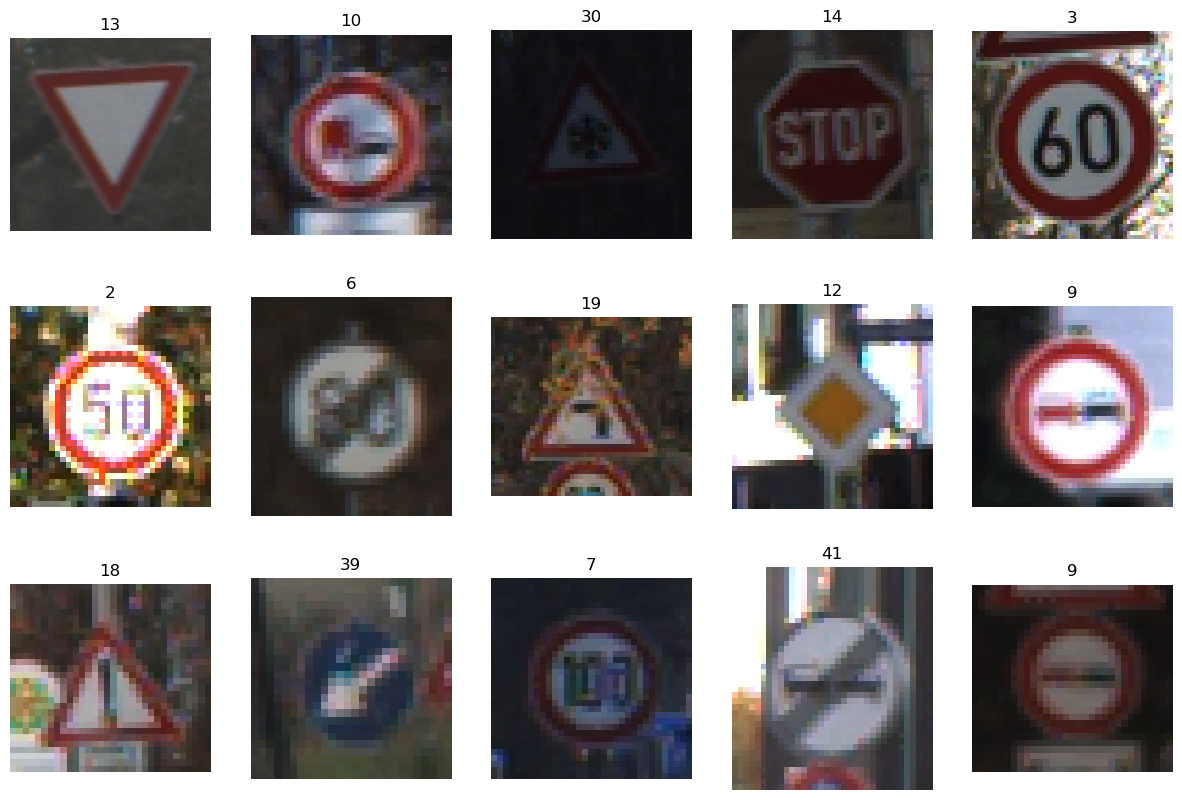

In [19]:
# Show random data samples
plt.figure(figsize=(15, 10))
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img_path = os.path.join(root, data.iloc[idx]['Path'])
    img = cv2.imread(img_path)
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3, 5, ii+1)
    plt.imshow(img)
    plt.title(data.iloc[idx]['ClassId'])
    plt.axis('off')
plt.show()

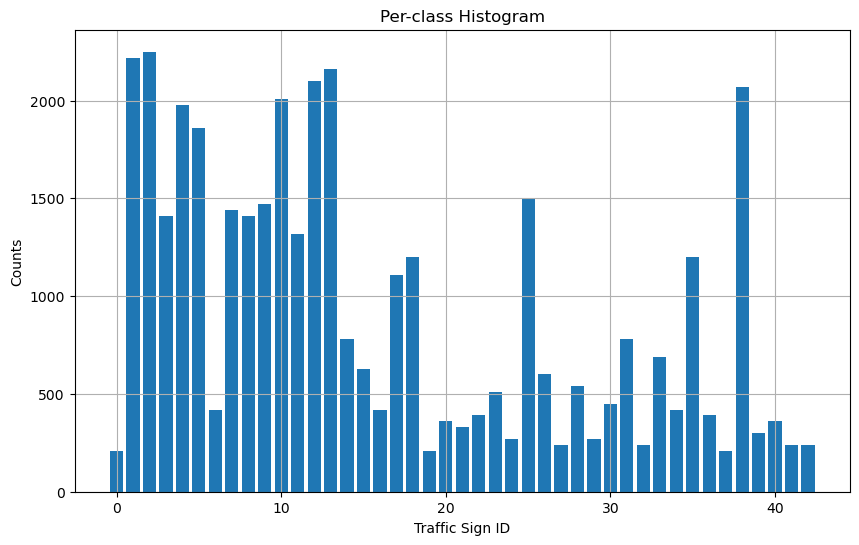

In [20]:
# Extract class identifiers
ids = data['ClassId'].values

# Compute the per class histogram
hist = Counter(ids)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(hist.keys(), hist.values())
plt.grid(True)
plt.xlabel('Traffic Sign ID')
plt.ylabel('Counts')
plt.title('Per-class Histogram')
plt.show()

***ANSWER***
1. The dataset is not well-balanced, we see that there are more items with some IDs and fewer with others.
2. We see that some classes are overrepresented (i.e.1-5) and some are underrepresented (i.e.19-24). The reason could be (as an assumption) that those signs (that are underrepresented) are not that frequent, so it is difficult to get a lot of data for those.

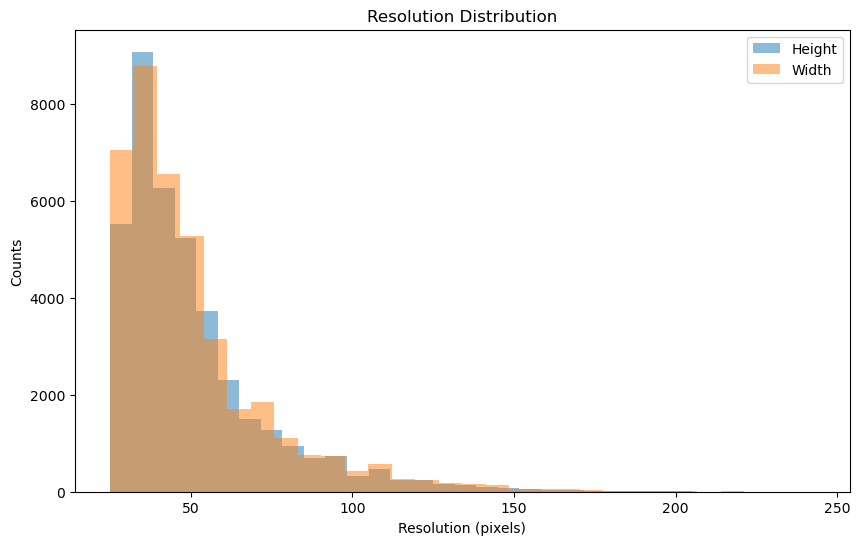

In [24]:
#Analyze image resolutions
resolutions = [cv2.imread(os.path.join(root, path)).shape[:2] for path in data['Path']]
resolutions = pd.DataFrame(resolutions, columns=['Height', 'Width'])

# Plot resolution distribution
plt.figure(figsize=(10, 6))
plt.hist(resolutions['Height'], bins=30, alpha=0.5, label='Height')
plt.hist(resolutions['Width'], bins=30, alpha=0.5, label='Width')
plt.legend()
plt.xlabel('Resolution (pixels)')
plt.ylabel('Counts')
plt.title('Resolution Distribution')
plt.show()

Seems like the majority of resolutions are around 30x30 pixels. Also, the majority of images are squares.

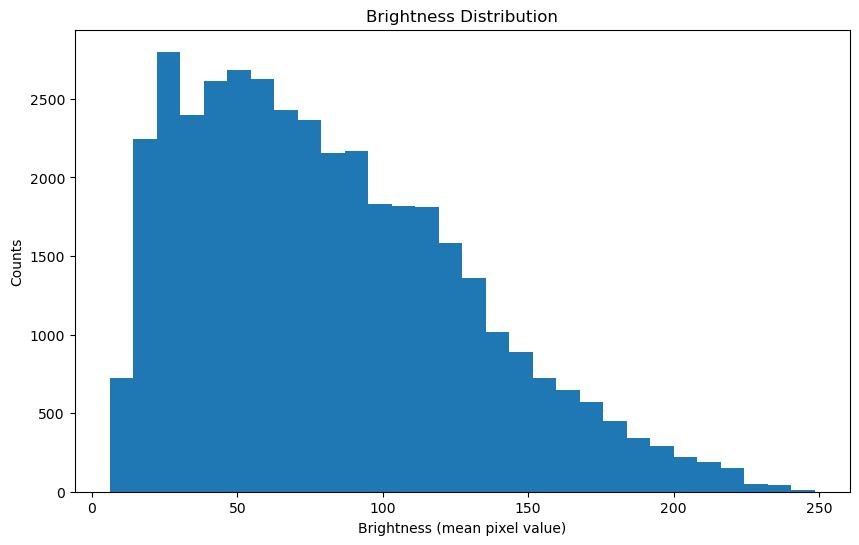

In [26]:
# Analyze image brightness
brightness = [cv2.cvtColor(cv2.imread(os.path.join(root, path)), cv2.COLOR_BGR2GRAY).mean() for path in data['Path']]
brightness = pd.Series(brightness, name='Brightness')

# Plot brightness distribution
plt.figure(figsize=(10, 6))
plt.hist(brightness, bins=30)
plt.xlabel('Brightness (mean pixel value)')
plt.ylabel('Counts')
plt.title('Brightness Distribution')
plt.show()


The majority of images are rather dark than light or balanced. 